<h4> Titanic Database </h4>

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
dframe= pd.read_csv('tested.csv')
dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. How many persons are there in different Pclass and each divided by sex?

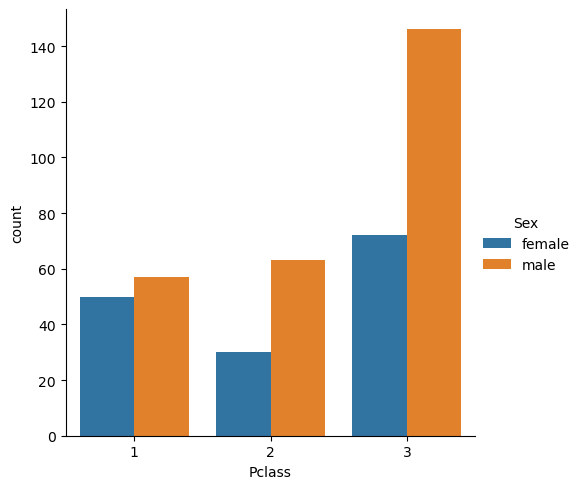

In [5]:
sns.catplot(x='Pclass', data=dframe,  kind='count', hue='Sex',order = [1, 2,3],hue_order = ['female','male'])
plt.show()

In [6]:
#Adding a new category
def child_pass(passenger):
    age,sex = passenger
    if age < 16:
     return 'child'
    else:
        return sex
    

In [7]:
dframe['person'] = dframe[['Age','Sex']].apply(child_pass,axis=1)

In [8]:
dframe[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,child
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,female
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,male
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,female
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,male


2. How different person are distributed in each pclass?

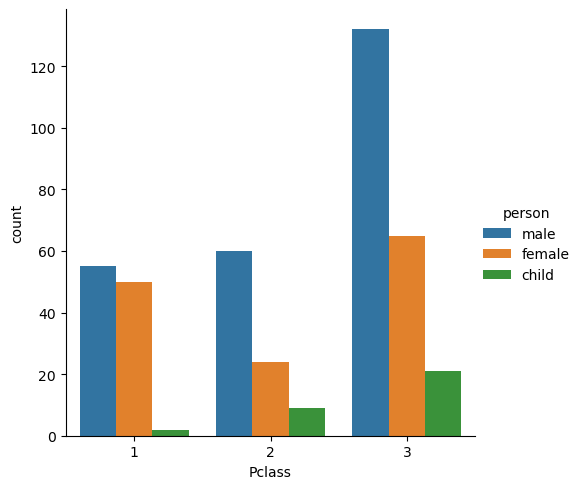

In [9]:
sns.catplot(x='Pclass',data=dframe,kind='count', hue='person')
plt.show()

3. Getting to know the Age Column distribution.

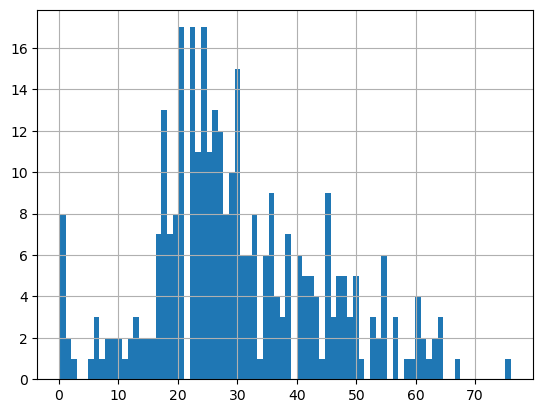

In [10]:
dframe['Age'].hist(bins=80)
plt.show()

In [11]:
dframe['Age'].mean()

30.272590361445783

In [12]:
dframe['person'].value_counts()

person
male      247
female    139
child      32
Name: count, dtype: int64

4. Distribution of Age column with respect to different person.

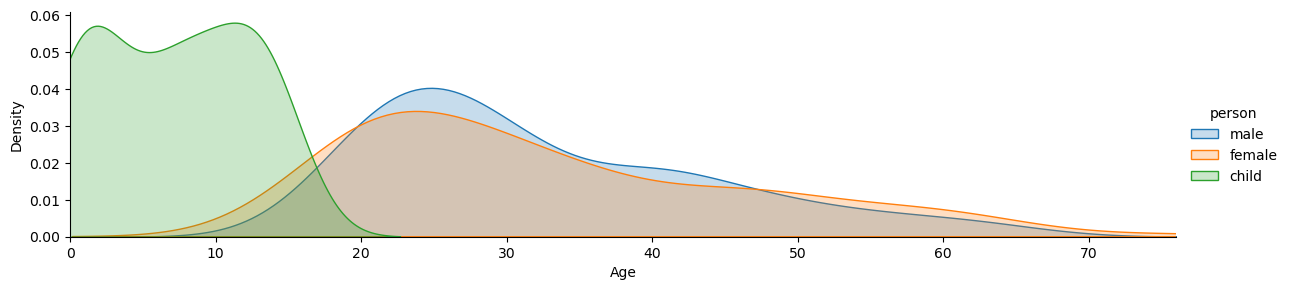

In [13]:
fig = sns.FacetGrid(dframe, hue='person', aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

xmax= dframe['Age'].max()
fig.set(xlim=(0,xmax))
fig.add_legend()
plt.show()

In [14]:
dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female


In [15]:
dframe['Cabin'].unique()



array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

5.Which Cabin has the largest no. of passesngers?

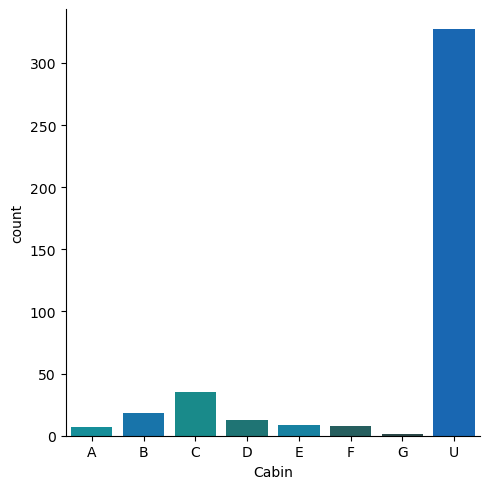

In [16]:
levels=[]
for level in dframe['Cabin']:
    if isinstance(level, str):
        levels.append(level[0])
    else:
        levels.append('U')  #--Unknown:Those who didn't have Cabins

cabin = DataFrame(levels)
cabin.columns = ['Cabin']

sns.catplot(x='Cabin', data=cabin, hue='Cabin', legend=False, 
            kind='count', order=sorted(cabin['Cabin'].unique()), palette='winter_d')
plt.show()

6. How each pclass in embarked column is distributed ?

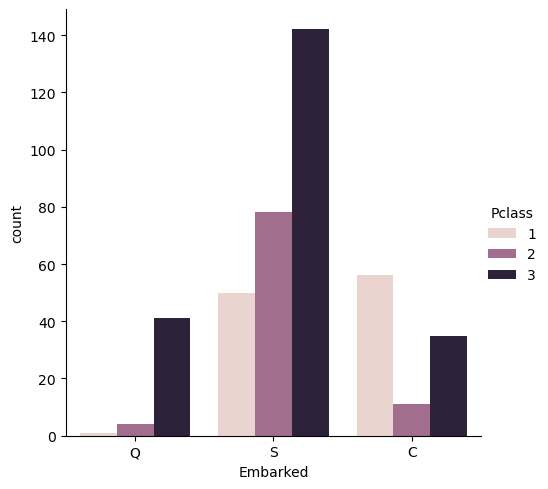

In [17]:
sns.catplot(x='Embarked',data=dframe,hue='Pclass',kind='count')
plt.show()

In [18]:
#Adding a companion column
dframe['Companion'] = dframe.SibSp +dframe.Parch

In [19]:
dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Companion
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female,2


In [20]:
dframe['Companion'] = dframe['Companion'].astype('object')

dframe.loc[dframe['Companion'] > 0, ['Companion']] = 'With Family'
dframe.loc[dframe['Companion'] == 0, ['Companion']] = 'Alone'

7. Who were with family and who were alone?

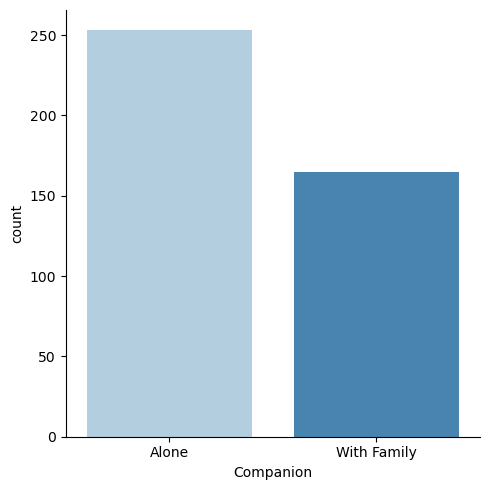

In [21]:
sns.catplot(x = 'Companion', hue= 'Companion',kind='count', legend= False,col=None, row=None, data= dframe, palette= 'Blues')
plt.show() 

8. Checking the survival chances in each pclass?

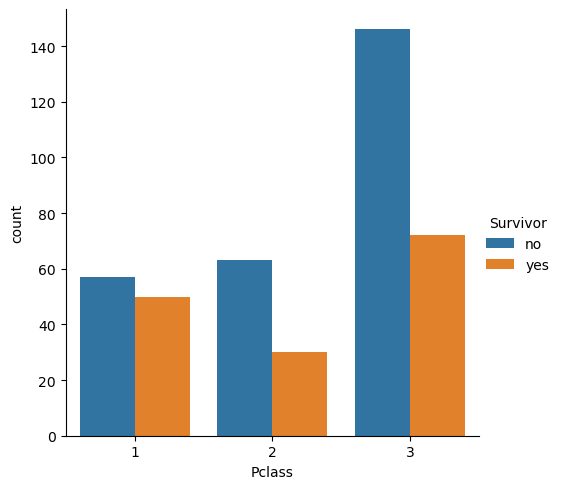

In [22]:
dframe['Survivor'] = dframe.Survived.map({0: 'no', 1 : 'yes'})
sns.catplot(x='Pclass', hue='Survivor', data=dframe, kind='count')
plt.show()

9. What is the person wise distribution of survival rate in each pclass?

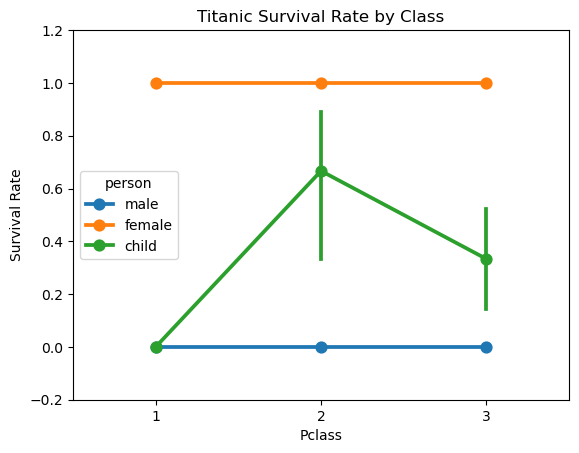

In [23]:
sns.pointplot(x='Pclass', y='Survived', hue= 'person', data=dframe, markers='o', linestyles='-')
plt.ylabel('Survival Rate')
plt.title('Titanic Survival Rate by Class')
plt.ylim(-0.2, 1.2)
plt.show()

10. Explaning the relationship between age and survived with respect to each pclass?

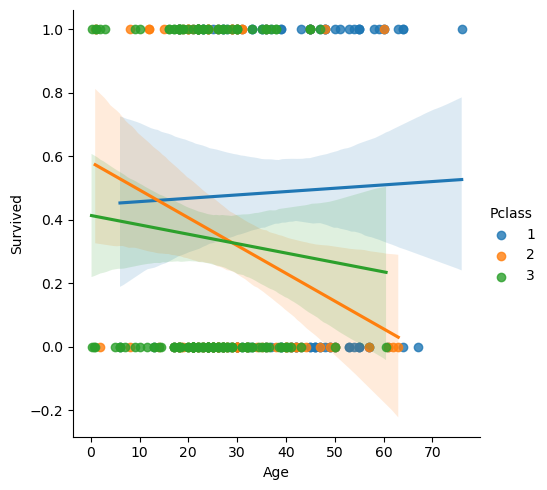

In [24]:
sns.lmplot(x='Age', y='Survived', hue= 'Pclass', data= dframe)
plt.show()

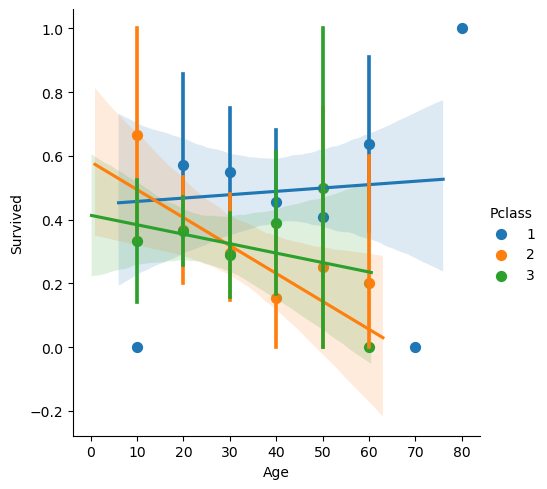

In [25]:
gen = [10,20,30,40, 50, 60, 70, 80, 90]
sns.lmplot(x='Age', y='Survived', hue= 'Pclass', data= dframe, x_bins = gen)
plt.show()

In [26]:
dframe['Cabin'] = dframe['Cabin'].fillna('Unknown')

In [27]:
deck = dframe['Cabin'].str[0]

In [28]:

dframe['Deck'] = deck

11.How different cabins have different survival rates?

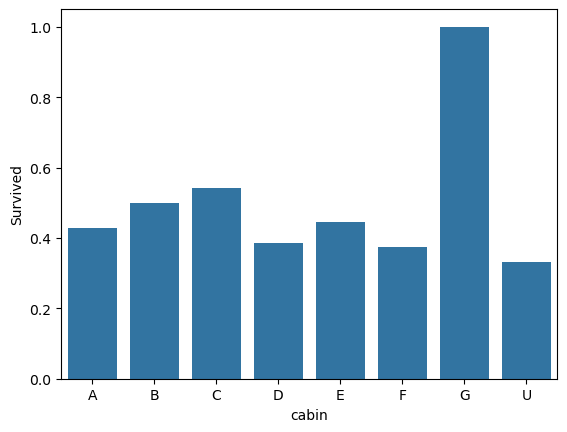

In [29]:
order= sorted(dframe['Deck'].unique())
new_df = pd.DataFrame({'cabin':deck, 'Survived': dframe['Survived'], 'sex': dframe['Sex']})
sns.barplot(x='cabin', y='Survived' ,order=order, data=new_df, errorbar=None)
plt.show()

12.Did having a companion affect survival rates?

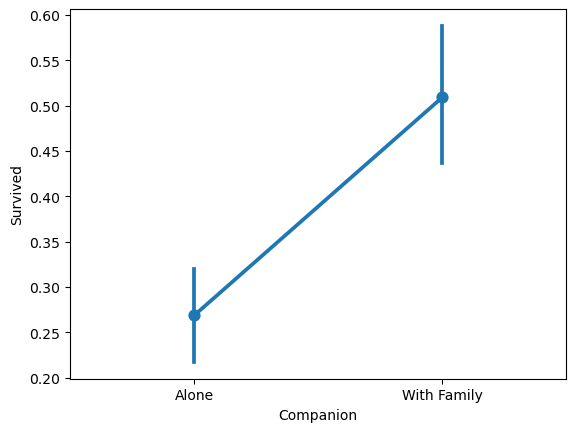

In [30]:
sns.pointplot(x='Companion', y = 'Survived', data= dframe, markers='o', linestyles='-')
plt.show()

In [31]:
dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Companion,Survivor,Deck
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,male,Alone,no,U
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,female,With Family,yes,U
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,male,Alone,no,U
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,male,Alone,no,U
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,female,With Family,yes,U


In [32]:
df= dframe.copy()
df.drop(columns=['Cabin', 'SibSp', 'Parch', 'Cabin','Name','person','Survivor','Deck'],inplace= True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Companion
0,892,0,3,male,34.5,330911,7.8292,Q,Alone
1,893,1,3,female,47.0,363272,7.0000,S,With Family
2,894,0,2,male,62.0,240276,9.6875,Q,Alone
3,895,0,3,male,27.0,315154,8.6625,S,Alone
4,896,1,3,female,22.0,3101298,12.2875,S,With Family


In [34]:
updated= df.copy()
updated['is_male'] = updated['Sex'].apply(lambda x: 1 if x == 'male' else 0)
updated['is_companion'] = updated['Companion'].apply(lambda x: 1 if x == 'With Family' else 0)


In [35]:
e_dummies = pd.get_dummies(updated['Embarked'], prefix='is_embarked')
c_dummies = pd.get_dummies(updated['Pclass'], prefix='is_pclass')

updated = pd.concat([updated,e_dummies, c_dummies],axis=1)


In [36]:
updated.drop(columns=['Embarked', 'Pclass', 'Sex', 'Companion'], inplace= True)

In [37]:
updated.head()

,PassengerId,Survived,Age,Ticket,Fare,is_male,is_companion,is_embarked_C,is_embarked_Q,is_embarked_S,is_pclass_1,is_pclass_2,is_pclass_3
0,892,0,34.5,330911,7.8292,1,0,False,True,False,False,False,True
1,893,1,47.0,363272,7.0000,0,1,False,False,True,False,False,True
2,894,0,62.0,240276,9.6875,1,0,False,True,False,False,True,False
3,895,0,27.0,315154,8.6625,1,0,False,False,True,False,False,True
4,896,1,22.0,3101298,12.2875,0,1,False,False,True,False,False,True


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [39]:
updated['Ticket'].sample(10)

386         349911
411          19928
390          12749
282         364859
154         347077
115           2680
250     C.A. 34651
95          350033
186    S.O./P.P. 2
184       PC 17558
Name: Ticket, dtype: object

In [40]:
temp= updated['Ticket'].str.contains(r'[a-zA-Z]', regex= True)
updated = updated[~temp]

In [41]:
scaler= StandardScaler()


In [75]:
updated= updated.dropna()
Y= updated['Survived']
X= updated.drop(columns='Survived')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, Y_train) 

Y_pred = model.predict(X_test_scaled)

In [59]:
coeff = model.coef_
coeff

array([[-4.80336493e-02, -1.24813572e-02,  1.48568353e-01,
         9.69535321e-02, -3.68154995e+00,  2.12947762e-01,
        -2.71400493e-02,  1.16573746e-01, -5.60361535e-02,
         6.24818105e-02, -6.41599091e-02, -8.15035062e-05]])

In [60]:
most_predictive= np.argmax(np.abs(coeff))
most_predictive

4

In [80]:
feature_index = 4
mean_values = X_train_scaled.mean(axis=0)

x_range = np.linspace(X_train_scaled[:, feature_index].min(), 
                       X_train_scaled[:, feature_index].max(), 
                       300)

x_plot = np.tile(mean_values, (len(x_range), 1))
x_plot[:, feature_index] = x_range

# # Step 5: Get the predicted probabilities for this new array
y_prob_pred = model.predict_proba(x_plot)[:, 1]

# Step 6: Create a DataFrame for the predicted curve
df_predicted = pd.DataFrame({
    'x_scaled': x_range.flatten(),
    'y_predicted_prob': y_prob_pred
})

df_train = pd.DataFrame({
    'x_scaled': X_train_scaled[:, feature_index].flatten(),
    'y_actual': Y_train
})
df_test = pd.DataFrame({
    'x_scaled': X_test_scaled[:, feature_index].flatten(),
    'y_actual': Y_test
})


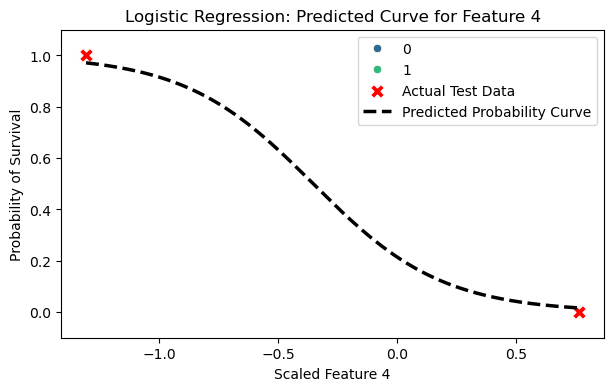

In [81]:
plt.figure(figsize=(7, 4))

sns.scatterplot(data=df_train, x='x_scaled', y='y_actual', hue='y_actual', palette='viridis')
sns.scatterplot(data=df_test, x='x_scaled', y='y_actual', color='red', marker='X', s=100, label='Actual Test Data')

sns.lineplot(data=df_predicted, x='x_scaled', y='y_predicted_prob', color='black', linestyle='--', linewidth=2.5, label='Predicted Probability Curve')

plt.title(f'Logistic Regression: Predicted Curve for Feature {feature_index}')
plt.xlabel(f'Scaled Feature {feature_index}')
plt.ylabel('Probability of Survival')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

In [44]:
confusion_matrix(Y_test,Y_pred)

array([[31,  0],
       [ 0, 16]], dtype=int64)

In [45]:
print(f'{classification_report(Y_test, Y_pred)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        16

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



Thank You!